In [1]:
import pytorch_lightning as pl

In [2]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
from dataset import *

In [3]:

args = {
    "datasets" : [
        "../../Datasets/train_iris_nd_crosssensor_2013", 
        "../../Datasets/train_iris_casia_v4",
        "../../train_iris_inno_a1",
        "../../Datasets/train_iris_nd_0405",
        "../../Datasets/train_iris_utris_v1"
    ],
    "predict_dataset" : "../../Datasets/iris_verification_iitd_01_01",
    "train_transform" : {
        "Resize" : {"size":[225,225]},
        "RandomInvert" : {"p":0},
        "Normalize" : {"mean":[0.5], "std":[0.25]},
        "RandomAdjustSharpness"  : {"sharpness_factor":3,"p":0.5},
        "RandomAutocontrast" : {"p":0.5},
        "RandomAffine": {
            "degrees":10, 
            "translate":[0.3, 0.3],
            "scale":[0.8, 2.66],
            "shear":5,
            "fill":0
        },
        "RandomErasing":{
            "p":0.2, 
            "scale":[0.02, 0.33],
            "ratio":[0.3, 3.3],
            "value":0, 
            "inplace":False
        }
    },
    "val_transform" : {
        "Resize" : {"size":[225,225]},
        "Normalize" : {"mean":[0.5], "std":[0.25]},
    },
    "test_transform" : {
        "Resize" : {"size":[225,225]},
        "Normalize" : {"mean":[0.5], "std":[0.25]},
    },
    "predict_transform" : {
        "Resize" : {"size":[225,225]},
        "Normalize" : {"mean":[0.5], "std":[0.25]},
    }
}

In [4]:
train_transform = transforms.Compose([
    transforms.ConvertImageDtype(torch.float),
    transforms.RandomAffine(**args["train_transform"]["RandomAffine"]),
    transforms.RandomAdjustSharpness(
        **args["train_transform"]["RandomAdjustSharpness"]
    ),
    transforms.RandomAutocontrast(
        **args["train_transform"]["RandomAutocontrast"]
    ),
    transforms.Resize(**args["train_transform"]["Resize"]),
    transforms.RandomInvert(**args["train_transform"]["RandomInvert"]),
    transforms.RandomErasing(**args["train_transform"]["RandomErasing"]),
    transforms.Normalize(**args["train_transform"]["Normalize"]),
])
#val transforms
val_transform=transforms.Compose([
    transforms.Resize(**args["val_transform"]["Resize"]),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(**args["val_transform"]["Normalize"]),
])
#test transforms
test_transform=transforms.Compose([
    transforms.Resize(**args["test_transform"]["Resize"]),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(**args["test_transform"]["Normalize"]),
])
#predict transforms 
predict_transform=transforms.Compose([
    transforms.Resize(**args["predict_transform"]["Resize"]),
    transforms.ConvertImageDtype(torch.float),
    transforms.Normalize(**args["predict_transform"]["Normalize"]),
])

In [5]:
ds = IrisDataset("../../Datasets/", ["train_iris_nd_crosssensor_2013", "train_iris_casia_v4"], transform=train_transform)

In [6]:
dl = DataLoader(ds, 100, num_workers=4)

In [7]:
for c, (i,l) in enumerate(dl):
    b = (i,l)
    break

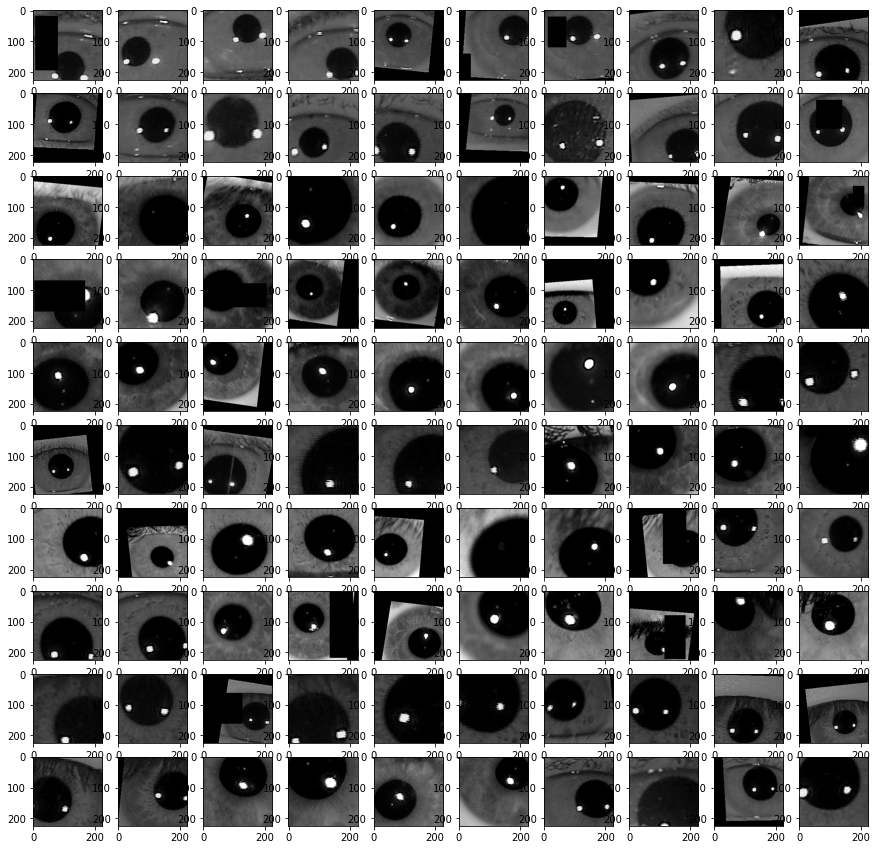

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(10,10,figsize=(15, 15))
for i,image in enumerate(b[0]):
    axs[i//10][i%10].imshow(image[0], cmap='gray')


In [9]:
b[1]

tensor([2435, 2435, 2435, 2435, 1470, 1470, 1470, 1470, 1930, 1930, 1930, 1930,
        1977, 1977, 1977, 1977, 1911, 1911, 1911, 1911,  482,  482,  482,  482,
         165,  165,  165,  165,  343,  343,  343,  343,  463,  463,  463,  463,
          32,   32,   32,   32,   59,   59,   59,   59,  162,  162,  162,  162,
        2052, 2052, 2052, 2052, 1399, 1399, 1399, 1399,  805,  805,  805,  805,
         198,  198,  198,  198,  365,  365,  365,  365, 1450, 1450, 1450, 1450,
         297,  297,  297,  297,  447,  447,  447,  447, 1495, 1495, 1495, 1495,
        2217, 2217, 2217, 2217, 1085, 1085, 1085, 1085,  494,  494,  494,  494,
        2401, 2401, 2401, 2401])